In [2]:
import pandas as pd
import numpy as np

file_path = 'Bengaluru_House_Data.csv'
data = pd.read_csv(file_path)

print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB
None
              area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move      

In [3]:
# Check for missing values
print(data.isnull().sum())

data = data.fillna(method='ffill')  


area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64


In [4]:
from sklearn.model_selection import train_test_split

# Assuming 'price' is the target column
X = data.drop(columns=['price'])  
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
print(data.describe())


               bath       balcony         price
count  13320.000000  13320.000000  13320.000000
mean       2.691742      1.586411    112.565627
std        1.339907      0.818939    148.971674
min        1.000000      0.000000      8.000000
25%        2.000000      1.000000     50.000000
50%        2.000000      2.000000     72.000000
75%        3.000000      2.000000    120.000000
max       40.000000      3.000000   3600.000000


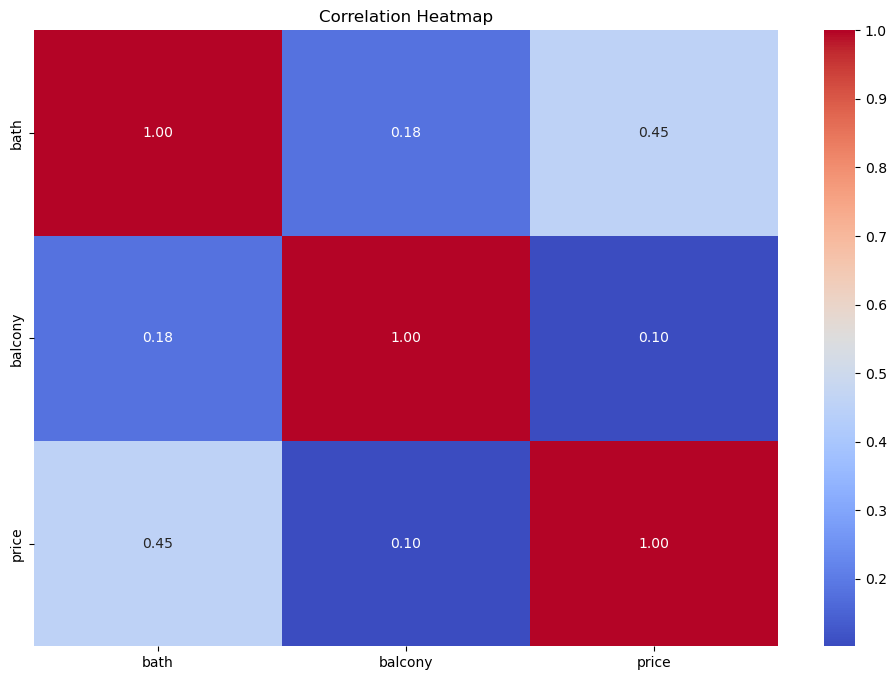

C:\Users\rajla\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


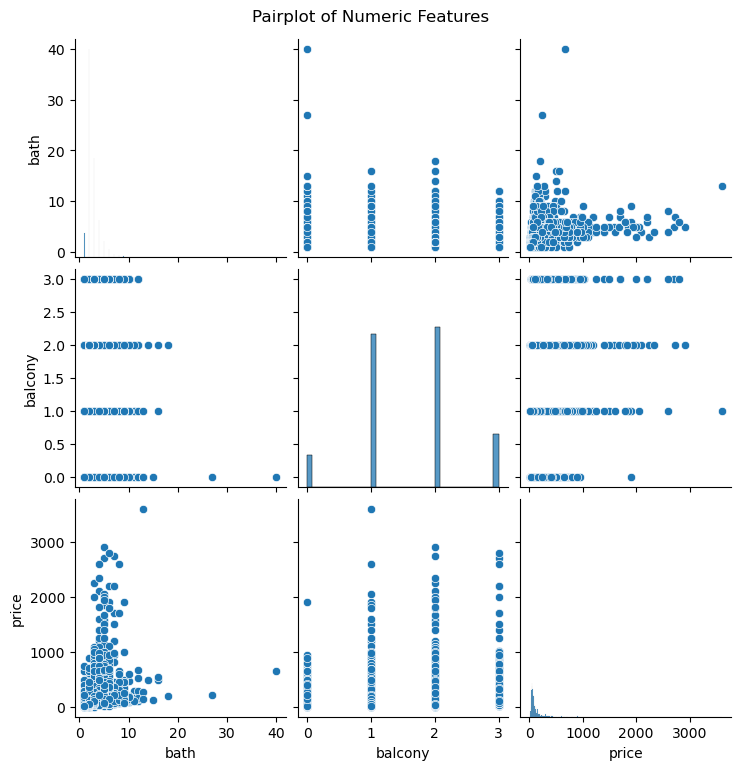

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

data_cleaned = data.dropna()

numeric_columns = data_cleaned.select_dtypes(include=['float64', 'int64']).columns
data_numeric = data_cleaned[numeric_columns]

plt.figure(figsize=(12, 8))
sns.heatmap(data_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

sns.pairplot(data_numeric)
plt.suptitle('Pairplot of Numeric Features', y=1.02)  # Adjust title position
plt.show()


In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Convert categorical columns to numeric if they exist
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    # Encoding categorical columns using LabelEncoder
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))

# Ensure the dataset only has numeric columns
X = data.drop(columns=['price'])  # Replace 'price' with your actual target column name
y = data['price']

# Train RandomForestRegressor
model = RandomForestRegressor()
model.fit(X, y)

# Get feature importance
feature_importance = model.feature_importances_

# Display feature importance
important_features = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
important_features = important_features.sort_values(by='Importance', ascending=False)

print(important_features)


        Feature  Importance
5    total_sqft    0.280481
6          bath    0.266790
2      location    0.150897
4       society    0.104784
3          size    0.084620
1  availability    0.043522
0     area_type    0.041317
7       balcony    0.027589


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# Check if the target column exists in the dataset
if 'price' not in data.columns:
    raise ValueError("Target column 'price' not found in dataset")

# Drop any rows with missing values (if necessary)
data = data.dropna()  # Or use fillna to fill missing values

# Encode categorical features if present
categorical_columns = data.select_dtypes(include=['object']).columns
if len(categorical_columns) > 0:
    from sklearn.preprocessing import LabelEncoder
    for col in categorical_columns:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col].astype(str))

# Prepare feature matrix (X) and target vector (y)
X = data.drop(columns=['price'])  # Remove target column from features
y = data['price']  # Target column

# Check the shape of X and y to ensure proper alignment
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the regression model (Linear Regression in this case)
model = LinearRegression()

# Perform 5-fold cross-validation to check the model performance
cross_val_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validation Mean Squared Error: {np.mean(cross_val_scores)}")

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance using RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")


Shape of X: (13320, 8)
Shape of y: (13320,)
Cross-validation Mean Squared Error: -17148.521361854844
Root Mean Squared Error (RMSE): 128.12526778831153


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

# Load the dataset
# Assuming the dataset is loaded as 'data'
file_path = 'Bengaluru_House_Data.csv'  # Adjust the file path if needed
data = pd.read_csv(file_path)

# Check if the target column exists
if 'price' not in data.columns:
    raise ValueError("Target column 'price' not found in dataset")

# Drop any rows with missing values (if necessary)
data = data.dropna()  # You can also use fillna to fill missing values

# Encode categorical features if present
categorical_columns = data.select_dtypes(include=['object']).columns
if len(categorical_columns) > 0:
    for col in categorical_columns:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col].astype(str))

# Prepare feature matrix (X) and target vector (y)
X = data.drop(columns=['price'])
y = data['price']

# Check the shape of X and y to ensure proper alignment
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Define a smaller hyperparameters grid for faster testing
param_grid = {
    'n_estimators': [100],
    'max_depth': [None, 10],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5
print("\nStarting GridSearchCV...")
grid_search.fit(X_train, y_train)

print("\nBest Hyperparameters found:")
print(grid_search.best_params_)

best_model = grid_search.best_estimator
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE) on Test Data: {rmse}")


Shape of X: (7496, 8)
Shape of y: (7496,)

Starting GridSearchCV...
Fitting 5 folds for each of 2 candidates, totalling 10 fits

Best Hyperparameters found:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Root Mean Squared Error (RMSE) on Test Data: 47.78642236399483


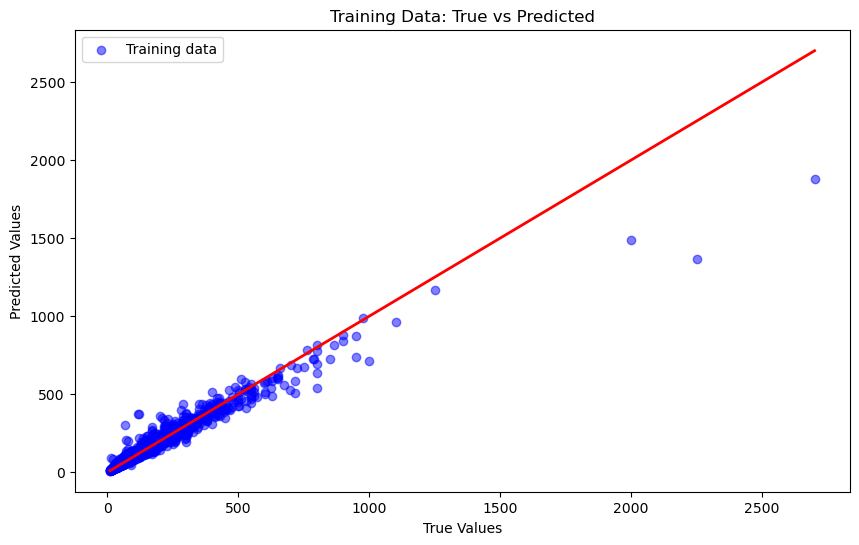

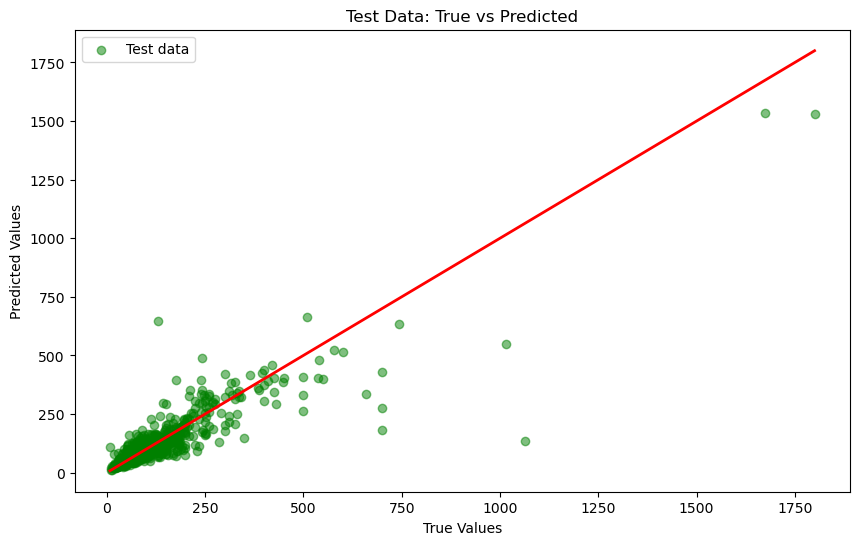

RMSE for Training Data: 24.250041366695257
RMSE for Test Data: 47.78642236399483


In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, color='blue', label='Training data', alpha=0.5)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', lw=2)  # Identity line
plt.title('Training Data: True vs Predicted')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

# Testing vs predicted values plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='green', label='Test data', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # Identity line
plt.title('Test Data: True vs Predicted')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"RMSE for Training Data: {rmse_train}")
print(f"RMSE for Test Data: {rmse_test}")


In [7]:
from sklearn.metrics import mean_squared_error

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("RMSE (Train):", rmse_train)
print("RMSE (Test):", rmse_test)


RMSE (Train): 24.250041366695257
RMSE (Test): 47.78642236399483
